<a href="https://colab.research.google.com/github/SergSpike/Classifying-Brain-Tumors/blob/main/Dataset_1(mat_type).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1nt6PoC3EUD1F4Ct9xYa7fEs86aM58LHW/view?usp=share_link

Downloading...
From (original): https://drive.google.com/uc?id=1nt6PoC3EUD1F4Ct9xYa7fEs86aM58LHW
From (redirected): https://drive.google.com/uc?id=1nt6PoC3EUD1F4Ct9xYa7fEs86aM58LHW&confirm=t&uuid=a9c5a3eb-5923-4f5d-bd77-1de728eca448
To: /content/BRAIN_DATA.zip
100% 879M/879M [00:18<00:00, 48.0MB/s]


In [ ]:
!unzip "/content/BRAIN_DATA.zip" > /dev/null  #-d "/content/Brain Tumor Dataset"

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

In [ ]:
# Now Take All the data into a list
data_dir='/content/BRAIN_DATA'
total_image=3064
trainindata=[]
for i in range(1,total_image+1):
  filename=str(i)+".mat"
  data=h5py.File(os.path.join(data_dir,filename),"r")
  trainindata.append(data)

  if i%100==0:
    print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [ ]:
trainindata[0]["cjdata"]["image"]

<HDF5 dataset "image": shape (512, 512), type "<i2">

In [ ]:
import keras
import random
random.shuffle(trainindata)

In [ ]:
import numpy as np
 # Now take all the image as train and test
trainx=[]
trainy=[]
testx=[]
testy=[]

size=round(4*total_image/5) # Split the dataset into 80:20
# For trainx and trainy
for i in range(size):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    trainx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    trainy.append(label)
# For trainx and trainy
for i in range(size,total_image):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    testx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    testy.append(label)

In [ ]:
# Converting list to numpy array
trainx=np.array(trainx).reshape(-1,512,512)
testx=np.array(testx).reshape(-1,512,512)
trainy=np.array(trainy)
testy=np.array(testy)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2439, 512, 512)
(610, 512, 512)
(2439,)
(610,)


In [ ]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Conv1D,MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv1D(64, 4, activation='relu', input_shape = (512,512))) #3 Conv1D
model.add(MaxPooling1D(pool_size=2)) #2
model.add(BatchNormalization())
# # model.add(Dropout(0.2))

model.add(Bidirectional(GRU(64, return_sequences=True)))

model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
# # model.add(Dropout(0.2))


model.add(Bidirectional(GRU(128, return_sequences=True)))

model.add(Conv1D(128, 2, activation='relu')) #2
#model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
# #model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation='relu')) #128
model.add(Dropout(0.2)) #0.3
model.add(BatchNormalization())
model.add(Dense(128, activation='softmax')) #128

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 509, 64)             │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 254, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 254, 128)            │          49,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 252, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 250, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 125, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 125, 256)            │         148,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 124, 128)            │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 62, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 62, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,015,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,688 (5.59 MB)

 Trainable params: 1,465,920 (5.59 MB)

 Non-trainable params: 768 (3.00 KB)

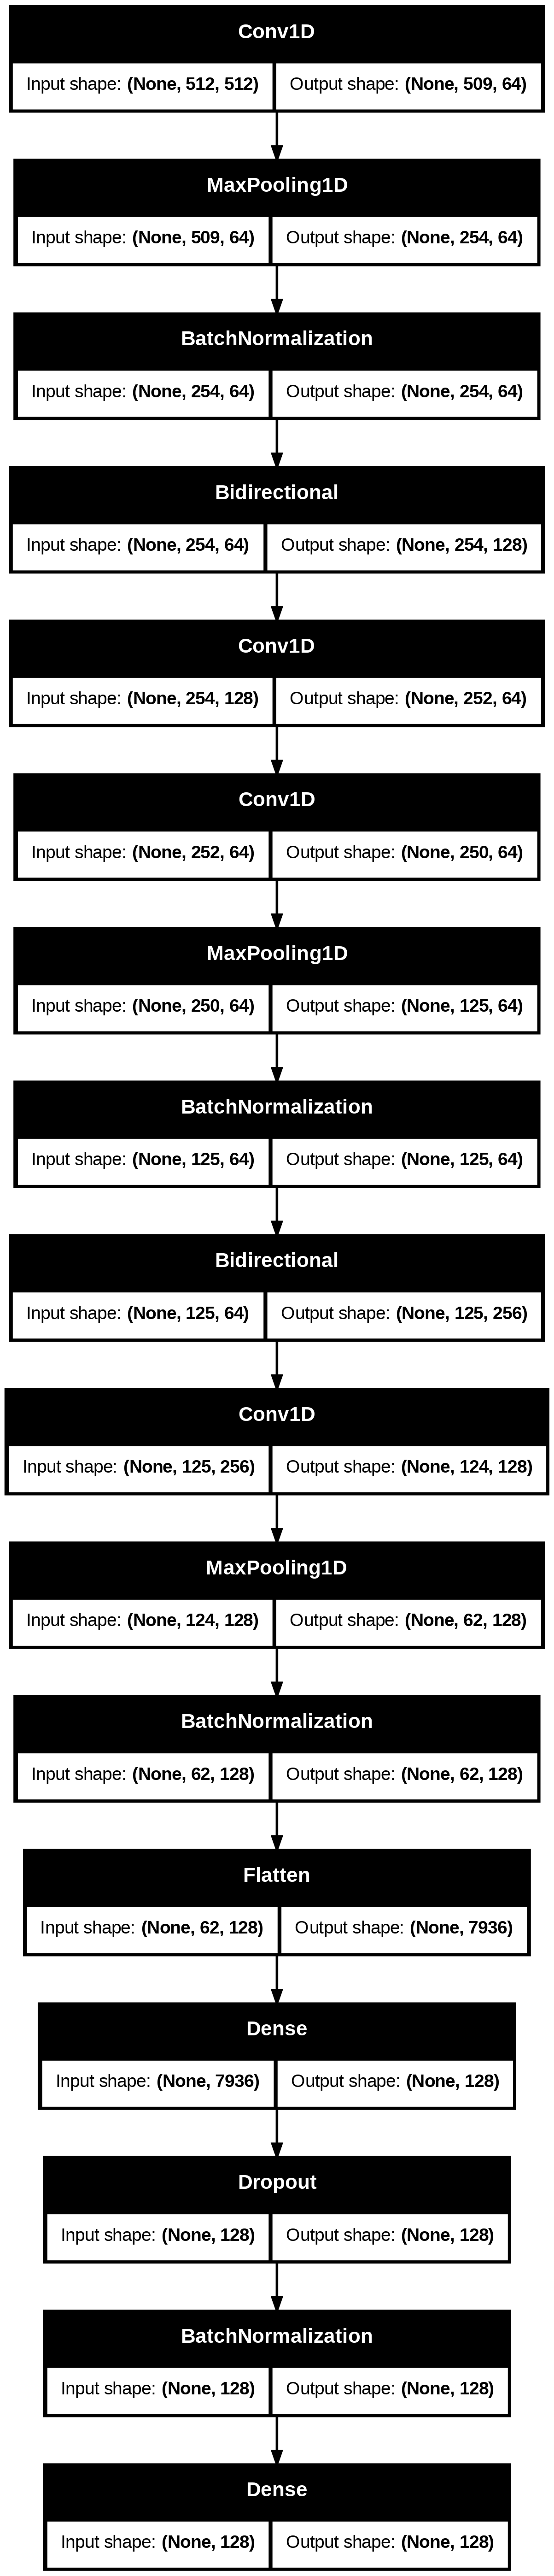

In [ ]:
# plot model architecture
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='CNN + BiGRU_architecture.png')

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
r=model.fit(trainx,
          trainy,
          epochs=80,
          batch_size=32,
          verbose=1,
          validation_data=(testx,testy),
          shuffle=False
          )

Epoch 1/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.6464 - loss: 2.3356 - val_accuracy: 0.5328 - val_loss: 3.6345
Epoch 2/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8610 - loss: 0.6467 - val_accuracy: 0.8541 - val_loss: 0.5767
Epoch 3/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9119 - loss: 0.3243 - val_accuracy: 0.8361 - val_loss: 0.5228
Epoch 4/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9299 - loss: 0.2257 - val_accuracy: 0.8787 - val_loss: 0.3668
Epoch 5/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9384 - loss: 0.1691 - val_accuracy: 0.8607 - val_loss: 0.4817
Epoch 6/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9456 - loss: 0.1670 - val_accuracy: 0.8689 - val_loss: 0.4293
Epoch 7/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.9687 - loss: 0.0904 - val_accuracy: 0.7967 - val_loss: 0.7334
Epoch 8/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9572 - loss: 0.1107 - val_accuracy: 0.8852 - 

In [ ]:

def plot_loss_curves_mplt(history,

                          fill_a=0,
                          with_best_point=False,
                          plt_style="seaborn-v0_8-whitegrid",
                          start_epoch=1,
                          figsize = (20, 8)
                          ):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]


    accuracy = history.history["accuracy"]

    val_accuracy = history.history["val_accuracy"]


    epochs = range(start_epoch, len(history.history["loss"])+1)

    index_loss = np.argmin(val_loss)  # This is the epoch with the lowest validation loss
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_accuracy)
    acc_highest = val_accuracy[index_acc]

    sc_label = 'Best epoch = ' + str(index_loss + start_epoch)
    vc_label = 'Best epoch = ' + str(index_acc + start_epoch)

    plt.figure(figsize=figsize, facecolor='white')
    plt.style.use(plt_style)

    # Plot loss
    plt.subplot(1, 2, 1)
    ax1 = plt.gca()  # Get the current axis
    ax1.plot(epochs, loss, '#008000', label='Training loss', linewidth=4)
    ax1.plot(epochs, val_loss,  "#FE0000", label='Validation loss', linewidth=4)
    if fill_a:
        ax1.fill_between(epochs, val_loss, loss, color='gray', alpha=fill_a)
    ax1.set_title("Training and Validation Loss", fontsize=20)
    ax1.set_xlabel("Epochs", fontsize=20)
    ax1.set_ylabel("Loss", fontsize=20)
    ax1.set_xlim([0.5, len(epochs)])
    # Plot best point
    if with_best_point:
        ax1.scatter(index_loss + start_epoch, val_lowest, s=150, c='blue', label=sc_label)
    ax1.legend(fontsize=18, loc='upper right', frameon=False)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    ax2 = plt.gca()  # Get the current axis
    ax2.plot(epochs, accuracy, '#008000',  label='Training Accuracy', linewidth=4)
    ax2.plot(epochs, val_accuracy,"#FE0000", label='Validation Accuracy', linewidth=4)
    if fill_a:
        ax2.fill_between(epochs, val_accuracy, accuracy, color='gray', alpha=fill_a)
    ax2.set_title("Training and Validation Accuracy", fontsize=20)
    ax2.set_xlabel("Epochs", fontsize=20)
    ax2.set_ylabel("Accuracy", fontsize=20)
    ax2.set_xlim([0.5, len(epochs)])
    ax2.set_ylim([0, 1.1])
    # Plot best point
    if with_best_point:
        ax2.scatter(index_acc + start_epoch, acc_highest, s=150, c='blue', label=vc_label)
    ax2.legend(fontsize=18, loc='lower right', frameon=False)

    plt.tight_layout()
    plt.show()

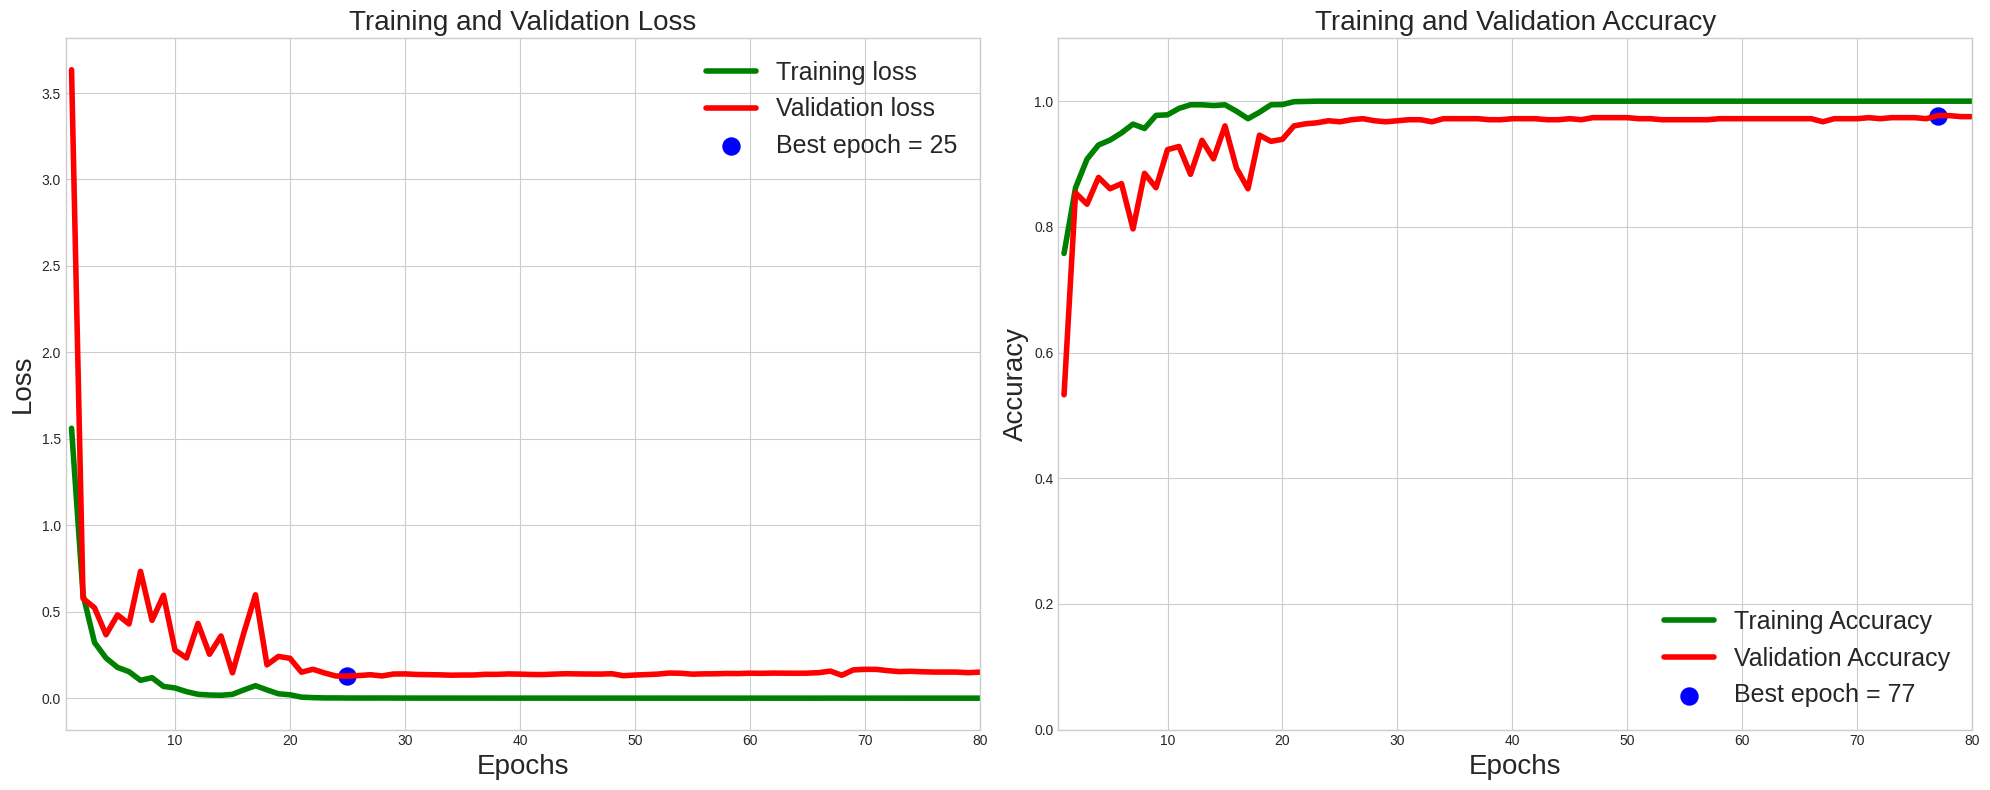

In [ ]:
plot_loss_curves_mplt(r, with_best_point=True)

In [ ]:
pred=model.predict(testx)
Y_pred = np.argmax(pred, 1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [ ]:
Y_pred.shape

(610,)

In [ ]:
testy.shape

(610,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(testy, Y_pred))

Confusion Matrix
[[133   6   2]
 [  7 265   0]
 [  0   0 197]]


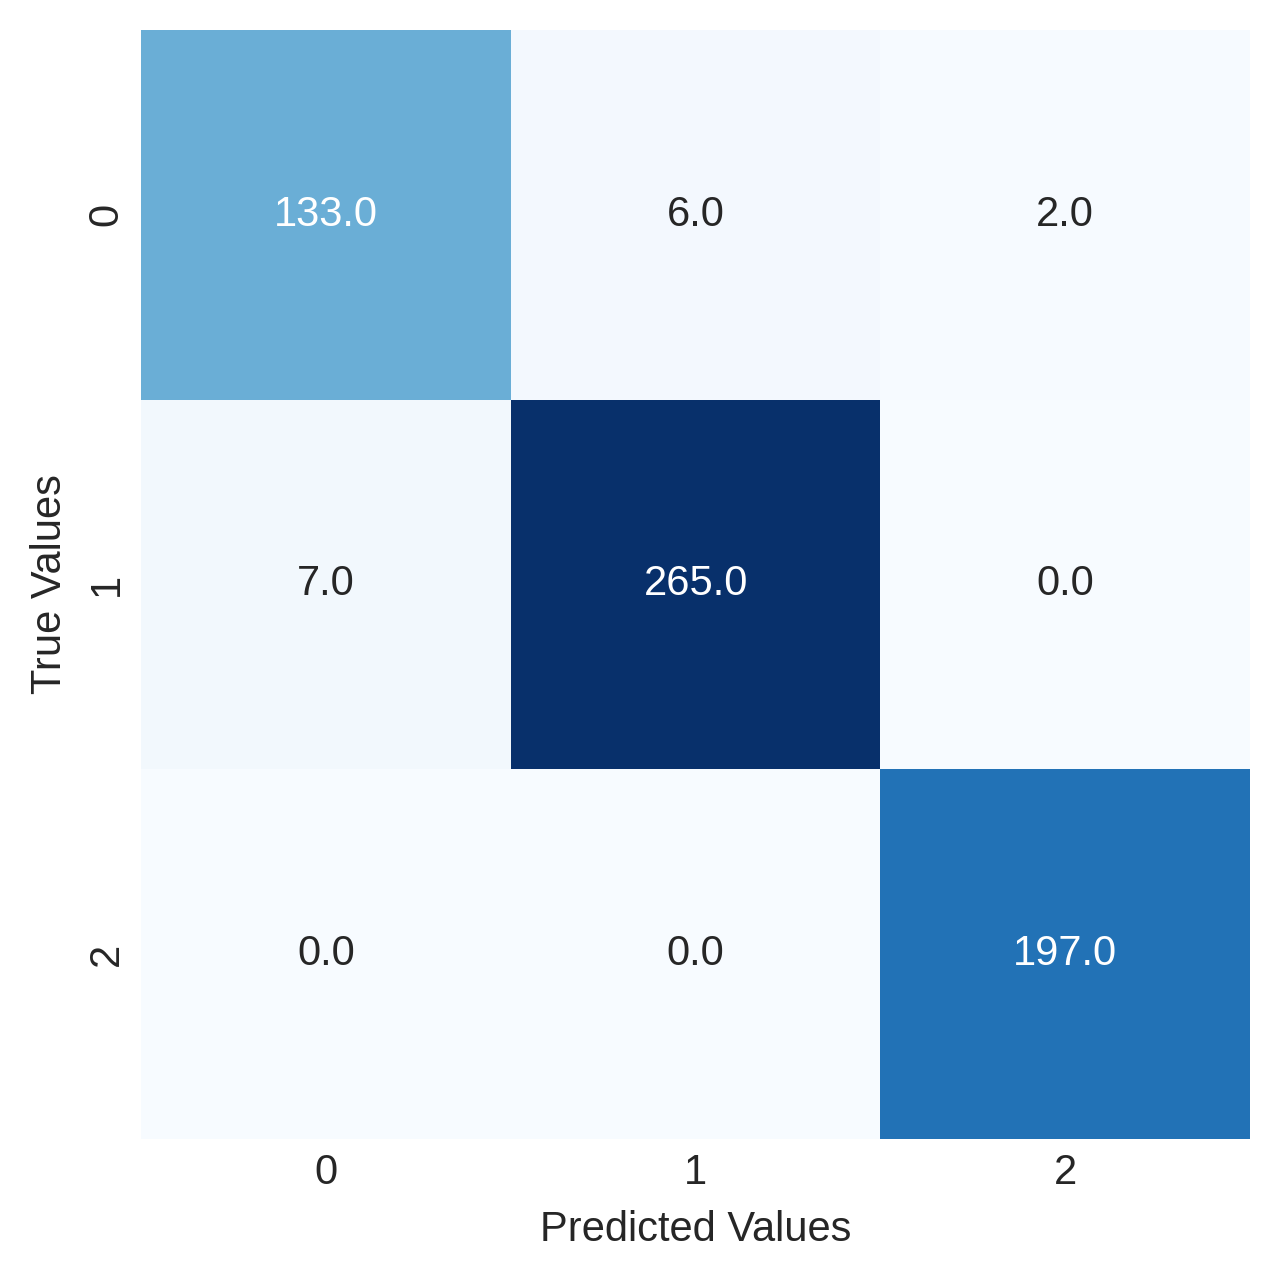

In [ ]:
import seaborn as sns
cm=confusion_matrix(testy, Y_pred)
plt.figure(dpi=300),sns.heatmap(cm, square=True, annot=True, fmt=".1f", cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [ ]:
print('Classification Report')
target_names = ['Meningioma', 'Glioma', 'Pituitary']
print(classification_report(testy, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  Meningioma       0.95      0.94      0.95       141
      Glioma       0.98      0.97      0.98       272
   Pituitary       0.99      1.00      0.99       197

    accuracy                           0.98       610
   macro avg       0.97      0.97      0.97       610
weighted avg       0.98      0.98      0.98       610



In [ ]:
print(trainy)

[0 2 1 ... 0 0 2]


[Text(0, 0.5, 'Meningioma'), Text(0, 1.5, 'Glioma'), Text(0, 2.5, 'Pituitary')]

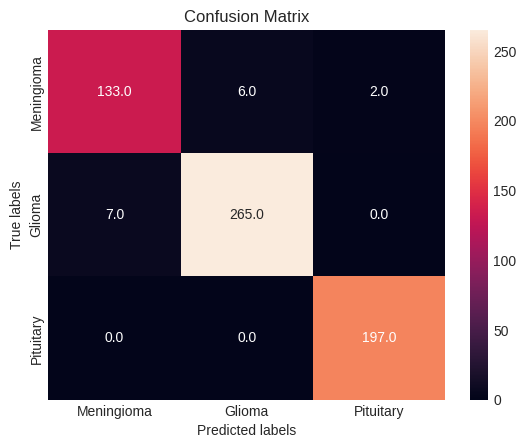

<Figure size 1920x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax= plt.subplot()
plt.figure(dpi=300),sns.heatmap(cm, annot=True, ax = ax, fmt=".1f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary']); ax.yaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary'])


Confusion Matrix :
[[133   6   2]
 [  7 265   0]
 [  0   0 197]]
Accuracy Score : 0.9754098360655737
Report : 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       141
           1       0.98      0.97      0.98       272
           2       0.99      1.00      0.99       197

    accuracy                           0.98       610
   macro avg       0.97      0.97      0.97       610
weighted avg       0.98      0.98      0.98       610



(<Figure size 1920x1440 with 2 Axes>, <Axes: >)

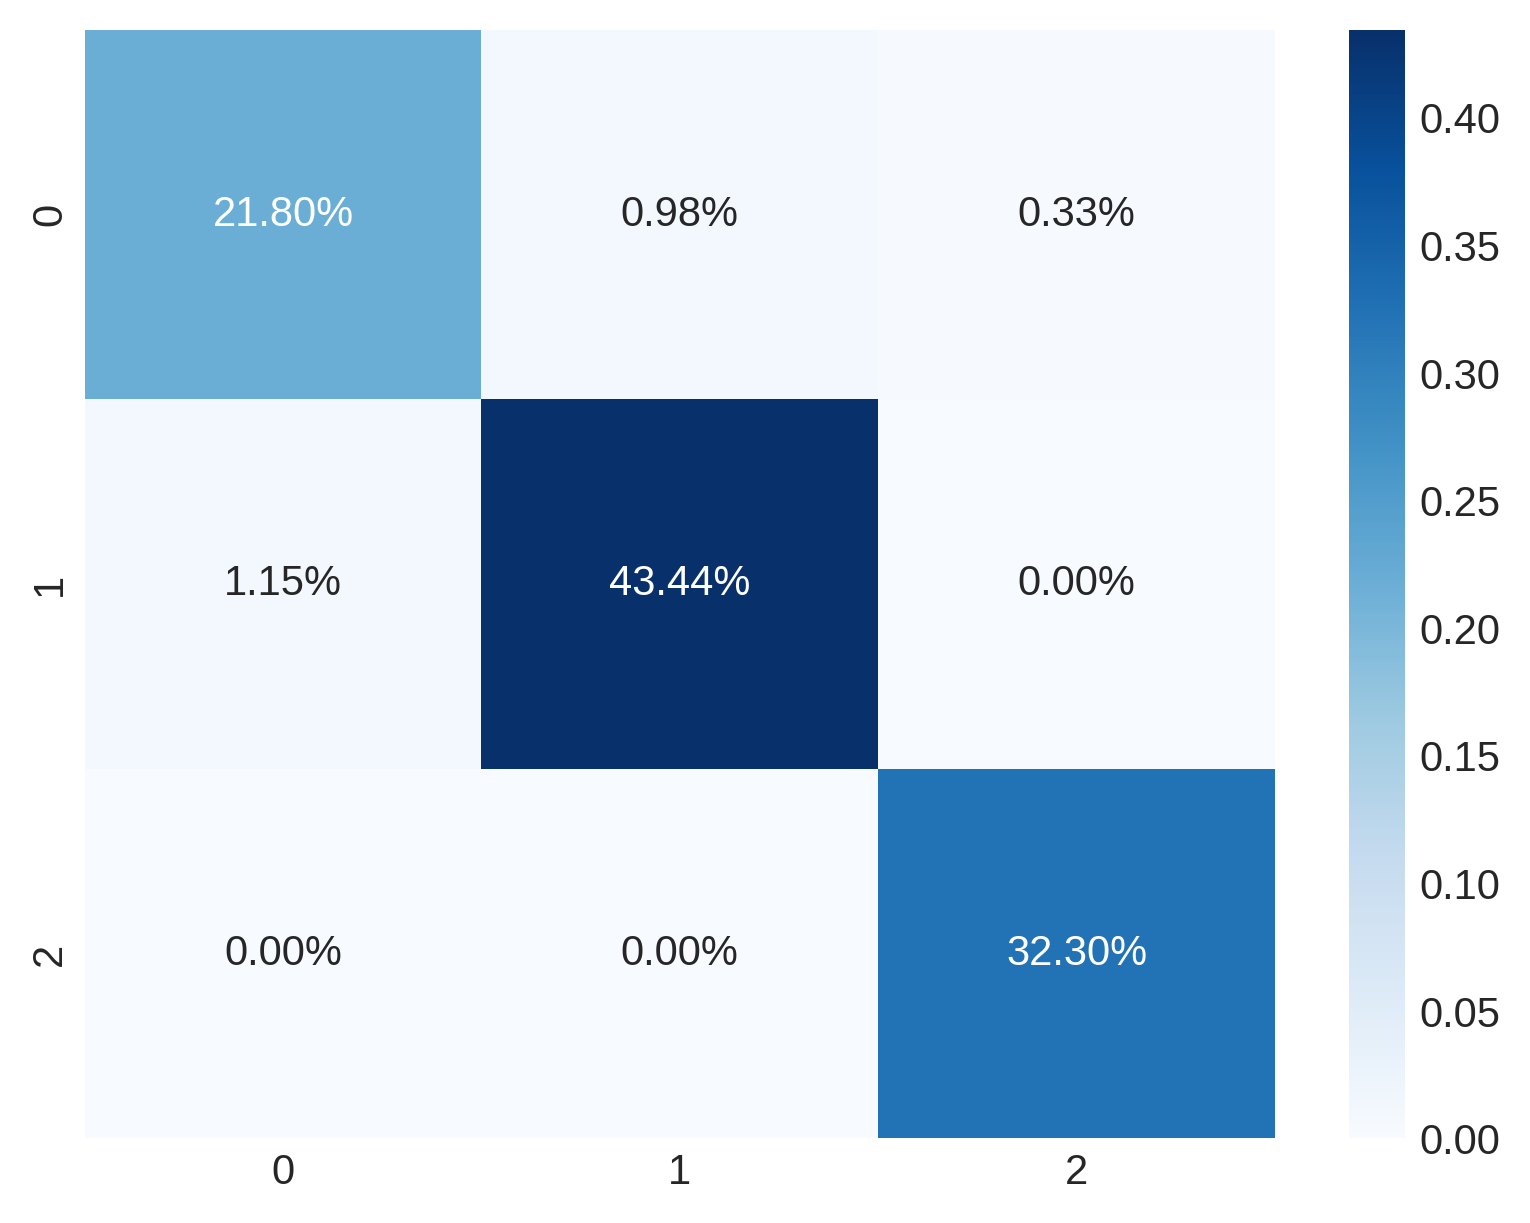

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(testy,Y_pred)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(testy,Y_pred))
print('Report : ')
print(classification_report(testy,Y_pred))

plt.figure(dpi=300),sns.heatmap(results/np.sum(results), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(testy, Y_pred, pos_label=2)
metrics.auc(fpr, tpr)


0.9975786924939467

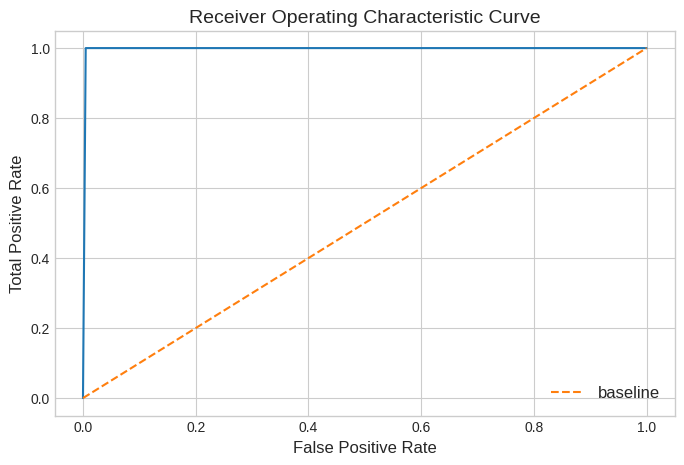

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);


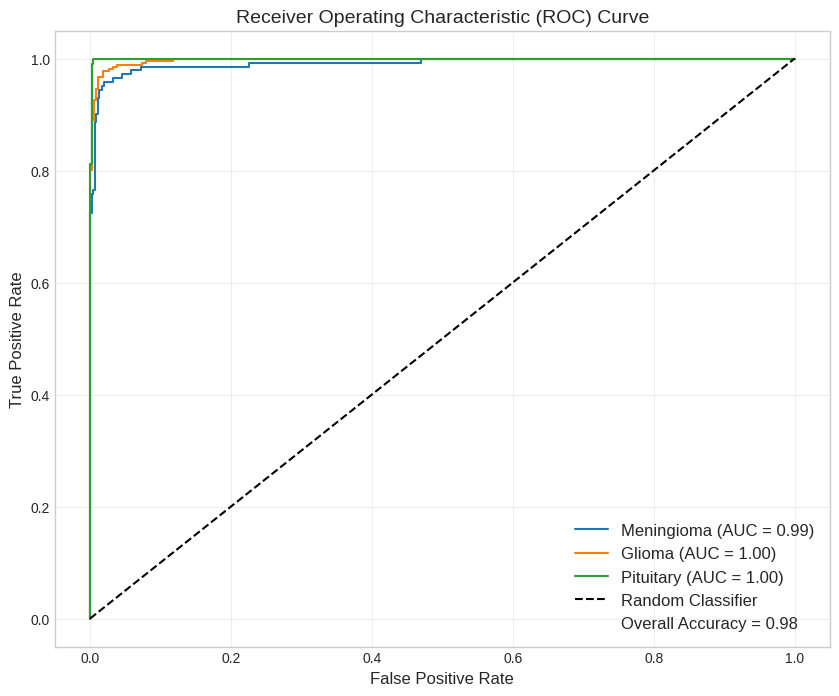

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score

# Assuming 'pred' holds your model's predictions for test data
# 'testy' holds your true labels for the test data

# Calculate overall accuracy
overall_accuracy = accuracy_score(testy, Y_pred)

# Initialize a dictionary to store FPR, TPR, and AUC for each class
roc_info = {}

# Calculate ROC curve and AUC for each class
for i, class_name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(testy, pred[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    roc_info[class_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for class_name, info in roc_info.items():
    plt.plot(info['fpr'], info['tpr'], label=f'{class_name} (AUC = {info["roc_auc"]:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add overall accuracy to the legend
plt.plot([], [], ' ', label=f'Overall Accuracy = {overall_accuracy:.2f}')

plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()
